In [1]:
import pandas as pd
import numpy as np

In [2]:
def block_recognition(file):
    file=pd.read_csv(file, delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charge','x','y','z','cell', 'block','zi'])

    a=False # first block'<'
    b=False # second block '<'
    c=False # third block '>'
    d=False # fourth block'>'
    block=[] ### Creation of the list
    check=True ### Initialisation of the parameter
    
    Ol=[]
    Oh=[]
    cells=pd.DataFrame(())
    ## Because the building block is constructing the structure in a such way that
    
    i=0 #Initialisation of the loop over the file  
    while i<len(file):
            #search for upper right block
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            #search for upper left block
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                b=True
                Oh+=[file.iloc[i+5]['id']]
                check=True
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            #search for lower left block
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                c=True
                check=False
                k=i+8
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                i=k
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                c=True
                check=False
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                k=i+8
                i=k
            #search for lower right block
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4:
                d=True
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                Ol+=[file.iloc[i+5]['id']]
                k=i+10
                check=True
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8:
                d=True
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                Ol+=[file.iloc[i+5]['id']]
                k=i+10
                check=True
                i=k

            #a,b,c,d=False if all the cells block have been recognized and check==True
            if a==True and b==True and c==True and d==True :
                a=False
                b=False
                c=False
                d=False
                check=True
            #search for water molecules
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                block+=['water']
                i+=1
            #if it is not water neither another block - could be bridging or interlayer
            else:
                ### check is False if the upper chain or the lower chain is not fully computed
                if check==False: # bridging site atoms
                    i+=1
                    block+=['bridge']
                if check==True: # interlayer atoms
                    block+=['-']
                    #print(file.iloc[i]['type'])
                    i+=1
    cells['Oh']=Oh
    cells['Ol']=Ol
    file['block']=block #Addin the collumn to define the block 
    return file, cells



In [3]:
def O_boundarysearch(final, O_boundary): 
    Oh=[]
    Ol=[]
    for index, boundary in O_boundary.iterrows():
        for index, point in final.iterrows():
            if float(point['id'])==boundary['Oh']: 
                Oh+=[[point['x'],point['y'],point['z']]]
            if float(point['id'])==boundary['Ol']: 
                Ol+=[[point['x'],point['y'],point['z']]]
    O_boundary['Oh']=Oh
    O_boundary['Ol']=Ol
    return O_boundary



In [4]:
#####################################################
### Computation of the planes equation parameters ###
#####################################################

def Cell_planes(O_boundary, df_location):
    
    #######################################
    ### Initialisation of the dataframe ###
    #######################################
    
    Cellplanes=pd.DataFrame((), columns=[])
    
    #######################################
    ### Initialisation of the variables ###
    #######################################
    
    na1=[]
    na0=[]
    nb0=[]
    nb1=[]
    out=[]
    idl=[]
    #######################################
    ### Computation in itself
    for k in range(0, len(O_boundary)):
        ### na1 direction of a1
        ### direction of a0
        k=(k)
        l=(df_location.iloc[k]['b0'])
        if l!='-': 
            l=int(l)
        n=(df_location.iloc[k]['a1'])
        i=0
        if n!='-':
            n=int((df_location.iloc[k]['a1']))
            m=(df_location.iloc[n]['b0'])
            if m!='-':
                m=int(m)
                # normal in a>0 direction
                na1+=[normal_plane(np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[k]['Oh']),np.array(O_boundary.iloc[l]['Oh']))]
                # normal in a<0 direction
                na0+=[normal_plane(np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[m]['Oh']),np.array(O_boundary.iloc[n]['Oh']))]
                #normal in b<0 direction
                nb0+=[normal_plane(np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[n]['Oh']),np.array(O_boundary.iloc[k]['Oh']))]
                #normal in b>0 direction
                nb1+=[normal_plane(np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[l]['Oh']),np.array(O_boundary.iloc[m]['Oh']))]
                idl+=[k]
            else:
                out+=[k]
        else:
            out+=[k]
            

    ###################################
    ### Attribution to the collumn  ###
    ####################################
    
    Cellplanes['na1']=na1
    Cellplanes['na0']=na0
    Cellplanes['nb0']=nb0
    Cellplanes['nb1']=nb1
    Cellplanes['id']=idl
    

    return Cellplanes

In [5]:
def normal_plane(point1, point2, point3,point4):
    vector1=point2-point1
    vector2=(point3+point4)/2-point1
    n=np.cross(vector1,vector2)
    d=-(n@point1)
    plane=[n[0],n[1],n[2],d]
    return np.array(plane)

In [6]:
def cell_init(file): ### Search the cells parameters given an initial structure - file==.lmp
    file=pd.read_csv(file, delim_whitespace=True, skiprows=8, nrows=4, names=['xy','xz','yz', 'u', 'v', 'w'], decimal='.')
    display(file)
    Lx=file.iloc[0]['xz']-file.iloc[0]['xy']
    Ly=file.iloc[1]['xz']-file.iloc[1]['xy']
    Lz=file.iloc[2]['xz']-file.iloc[2]['xy']
    xy=float(file.iloc[3]['xy'])
    xz=float(file.iloc[3]['xz'])
    yz=float(file.iloc[3]['yz'])
    a,b,c=[Lx,0,0],[xy,Ly,0],[xz,yz,Lz]
    #print(box)
    cell=[a,b,c]
    return cell

In [7]:
def cell_time(file, time): ### Search the cells parameters given a file and the timestep needed - file==.dump
    file=pd.read_csv(file, delim_whitespace=True, skiprows=time+4, nrows=3, names=['xy','xz','yz'], decimal='.')
    display(file)
    Lx=file.iloc[0]['xz']-file.iloc[0]['xy']
    Ly=file.iloc[1]['xz']-file.iloc[1]['xy']
    Lz=file.iloc[2]['xz']-file.iloc[2]['xy']
    xy=file.iloc[0]['yz']
    xz=file.iloc[1]['yz']
    yz=file.iloc[2]['yz']
    a,b,c=[Lx,0,0],[xy,Ly,0],[xz,yz,Lz]
    cell=[a,b,c]
    return cell


In [8]:
def interlayer(final,final_name,file, Cellplanes, time):

    #######################
    ### Cells variables ###
    #######################
    cell=cell_time(final_name, time)
    c=cell[2][2]
    ###################################
    ### Initialisation of the block ###
    ###################################
    
    final['block']='-'
    
    #######################################
    #### Initialisation of the variable ###
    #######################################
    
    zi=[]
    
    ##########################################################
    ### Analyse the point location to divide the structure ###
    ##########################################################
    
    for i in range(0,len(final)):
        final.at[i,'block']=file.at[int(final.at[i,'id'])-1, 'block']
        point2=np.array([final.iloc[i]['x'],final.iloc[i]['y'],final.iloc[i]['z'], 1])
        if final.iloc[i]['z']<=c/2:
            zi+=[0]
        if final.iloc[i]['z']>c/2:
            zi+=[1]
        
            
    ###################################
    ### Attribution to the collumn  ###
    ###################################
    
    final['zi']=zi
    
    return final

,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


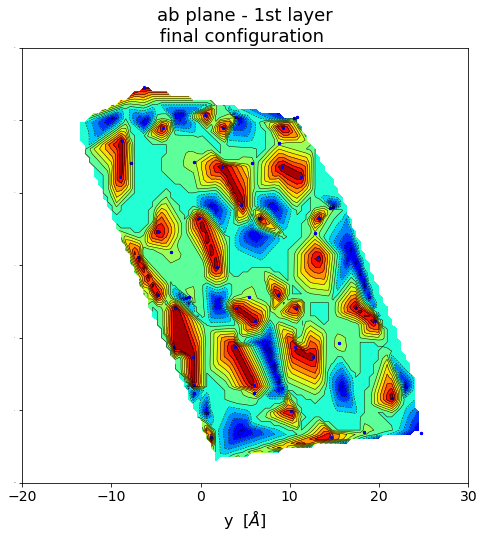

,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


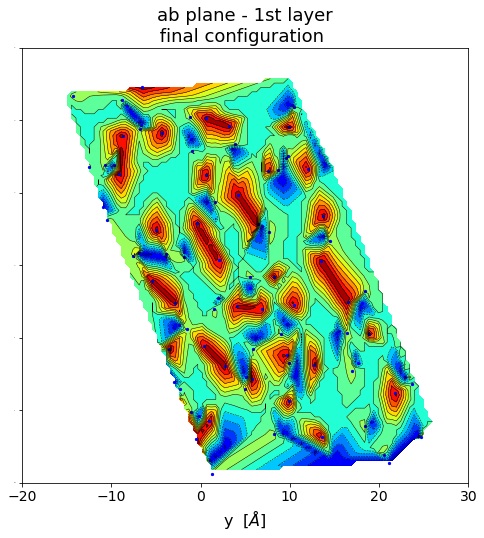

,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


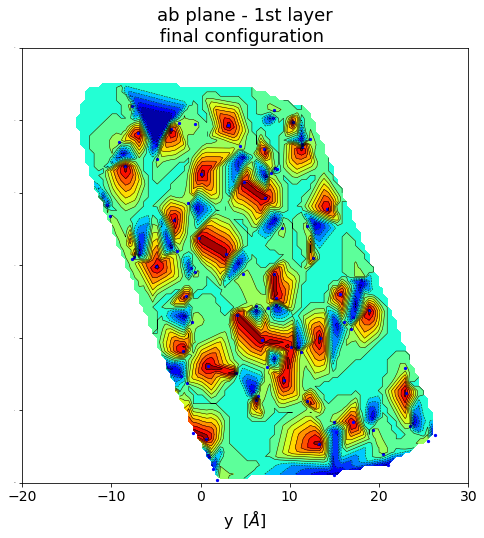

,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


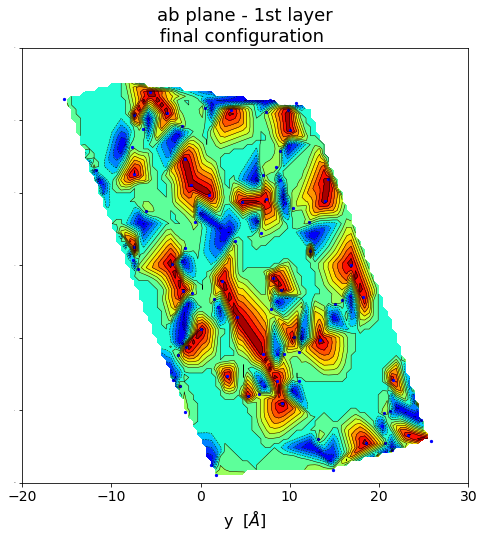

,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


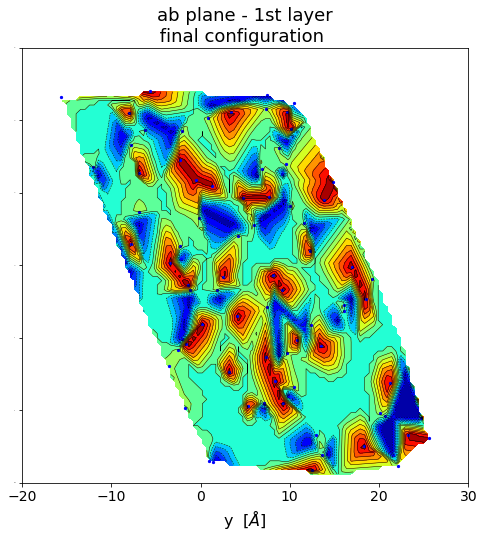

,xy,xz,yz
0,-17.167446,28.884346,-17.168916
1,-12.408559,24.861357,1.945015
2,0.302091,27.685276,-12.385286


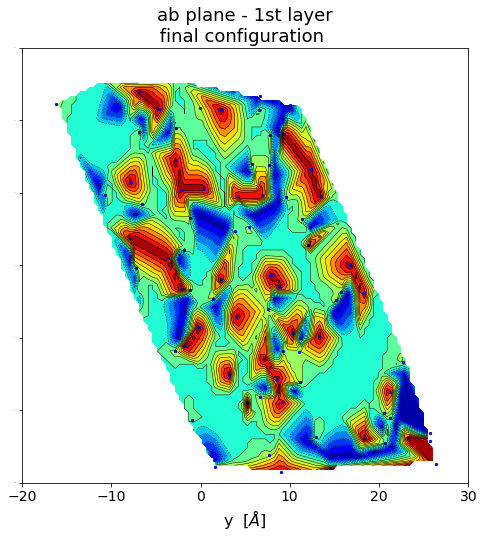

,xy,xz,yz
0,-17.009547,28.836120,-17.045827
1,-12.348745,24.855394,1.931600
2,0.304614,27.682753,-12.331435


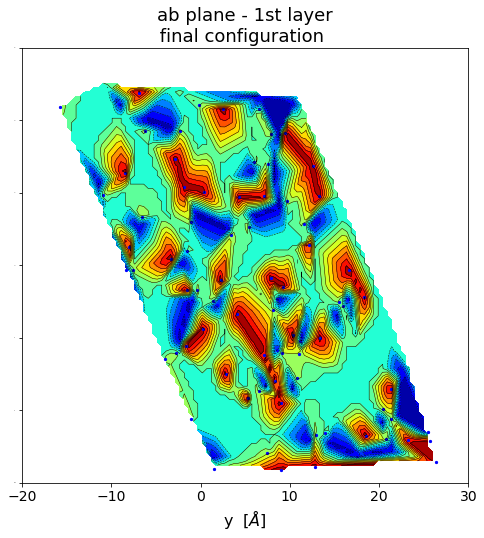

In [21]:
initial1='data/qualitative/data_lmpo0001.lmp'
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


df=pd.read_csv('data/output/timestep.txt', delim_whitespace=True)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
#display(df_location)

for index, i in df.iterrows(): ### scans of the simulation 
    ### Separations of 
    t=i['atoms'] #### locates the positions of the file 
    time=i['timestep']
    ##################################
    ### initialisation of the plot ###
    ##################################
    plt.figure(figsize=(8, 8))     # A plot is performed for each timestep

    
    
    #######################################################################
    ### Read the files and attributes the block and structure divisions ###
    #######################################################################
    initial,O_boundaryi=block_recognition(initial1)

    final_name='data/qualitative/all.dump'
    final=pd.read_csv('data/qualitative/all.dump', delim_whitespace=True, skiprows=t, nrows=2025, names=['id','type','x','y','z','vx','vy','vz','fx','fy','fz','cell', 'block','zi'])
    O_boundaryf=O_boundarysearch(final, O_boundaryi)
    cellplanes=Cell_planes(O_boundaryf, df_location)
    final=interlayer(final, final_name, initial,cellplanes, time)
    
    #######################################
    ### Initialisation of the variables ###
    #######################################
    
    x=[]
    y=[]
    z=[]
    charge=[]
    
    xm=[]
    ym=[]
    
    #########################################
    ### Search for the points of interest ###
    #########################################
    
    for index, point in final.iterrows():
        #print(point)
        if point['block']=='-' and point['zi']==0: ## Adding the interlayers points 
            x+=[point['x']]
            xm+=[point['x']]
            y+=[point['y']]
            ym+=[point['y']]
            z+=[point['z']]
            charge+=[initial.iloc[int(point['id'])-1]['charge']]
        if point['block']=='water' and point['zi']==0: ## Add the water but with charge==0 in order to make the plots readable
            x+=[point['x']]
            y+=[point['y']]
            z+=[point['z']]
            charge+=[0]
    
    
    ##############################
    ### definition of the grid ###
    ##############################
    
    xi = np.linspace(-20,30,100)
    yi = np.linspace(-5,25,100)
    zi = griddata((x, y), charge, (xi[None,:], yi[:,None]), method='linear') #linear interpolation
    
    #######################
    ### Plot production ###
    #######################
    
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    #plt.colorbar() 

    plt.scatter(xm,ym,marker='o',c='b',s=5)
    

    
    
    ##########################
    ### Ploting parameters ###
    ##########################
    
    
    
    plt.xlabel(r'y  [$\AA$]', fontsize=16)
    #plt.ylabel(r'y  [$\AA$]', fontsize=14)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=0)
    
    plt.title('ab plane - 1st layer\n final configuration  ', fontsize=18)
    plt.autoscale(enable=True, axis='both')
    plt.show()